In [1]:
import pandas as pd
import sympy as sp 
import numpy as np 
import matplotlib.pyplot as plt      
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.width', 400)         # MOSTRAR TODAS AS COLUNAS HORIZONTALMENTE
pd.set_option('display.max_columns', None)  # NÃO HÁ LIMITE DE COLUNAS
pd.set_option('display.max_rows', 10)       # MOSTRA SEMPRE 10 LINHAS

# IMPORTANDO OS DADOS

In [2]:
df = pd.read_excel('Dados.xlsx')
df.head()

,TIPO,Data,Dia,PLACA,ID do ativo,Número de registro do ativo,Nome da garagem,motorista,ID do motorista,Colunas1,Nº do funcionário,Hora de início da primeira viagem,Bateria inicial %,Última hora de término de viagem,Bateria final %,Fuso horário,Horas entre o começo da primeira viagem e fim da última viagem (hh:mm:ss),Tempo de Condução vs Tempo Parado,Tempo Parado %,Tempo em marcha lenta %,Tempo de Condução (hh:mm:ss),Tempo Parado (hh:mm:ss),Duração (hh:mm:ss),Tempo em marcha lenta (hh:mm:ss),Tempo Estacionado (hh:mm:ss),Hodômetro inicial (km),Hodômetro final (km),distância (km),Energia consumida (kWh),Energia consumida por auxiliar (kWh),Energia gerada (kWh),Energia total (kWh),Eficiência (kWh/km),Combustível Utilizado (Litros),Consumo de combustível medido (L/100 km),Consumo de combustível medido (L/h),Total de CO2-EST (Kg),Horas do motor Início,Horas do motor Fim,Horas do motor (hh:mm:ss),Velocidade média (km/h),Velocidade Máxima (km/h),Distância privada (km),Contagem de viagens
0,VUC,2023-05-17,Quarta-feira,QRG0G39,58,QRG0G39,SÃO PAULO,ALEX SANDRO JESUS DOS SANTOS,54,NaN,1.746218e+10,01:03:41,NaN,22:40:51,NaN,BRT,21:37:10,NaN,0.05,0,13:58:46,00:40:26,14:39:12,00:00:00,05:11:42,56584.95,57173.95,1036.23,NaN,NaN,NaN,NaN,0,0.000,0.000,0.000,0.00,1900-01-20 06:36:16,1900-01-20 06:36:16,00:00:00,74.13,91,1036.23,17
1,TOCO,2023-05-31,Quarta-feira,PPQ8J90,40,PPQ8J90,SÃO PAULO,ADAIL JOSE BORGES,55,NaN,7.165222e+10,00:02:49,NaN,00:13:41,NaN,BRT,1900-01-01 00:10:52,NaN,0.05,0,12:58:49,00:41:32,13:40:21,00:00:00,10:59:35,756136.58,757023.75,887.25,NaN,NaN,NaN,NaN,0,125.914,14.192,9.262,333.67,1900-04-02 03:09:47,1900-04-02 16:45:34,13:35:40,68.35,86,887.25,10
2,TOCO,2023-05-05,Sexta-feira,PPQ8J90,40,PPQ8J90,SÃO PAULO,ADAIL JOSE BORGES,55,NaN,7.165222e+10,00:04:15,NaN,03:36:03,NaN,BRT,1900-01-01 03:31:48,NaN,0.06,0,12:27:22,00:44:29,13:11:51,00:00:00,11:09:36,746099.21,747096.44,854.96,NaN,NaN,NaN,NaN,0,110.839,12.964,8.508,293.72,1900-03-25 19:21:12,1900-03-26 11:36:01,13:01:37,68.64,86,854.96,8
3,TOCO,2023-07-06,Quinta-feira,PPQ8J90,40,PPQ8J90,SÃO PAULO,ADAIL JOSE BORGES,55,NaN,7.165222e+10,00:09:01,NaN,23:53:37,NaN,BRT,23:44:36,NaN,0.08,0,12:58:21,01:08:19,14:06:40,00:00:00,09:49:11,767233.02,768094.81,842.50,NaN,NaN,NaN,NaN,0,106.316,12.619,7.704,281.74,1900-04-10 07:36:32,1900-04-10 21:24:48,13:48:03,64.95,118,842.50,22
4,TOCO,2023-06-20,Terça-feira,PPQ8J91,34,PPQ8J91,SÃO PAULO,PAULO DE OLIVEIRA SOARES,51,NaN,8.993649e+10,00:04:58,NaN,04:42:34,NaN,BRT,1900-01-01 04:37:36,NaN,0.07,0,12:56:11,00:57:02,13:53:13,00:00:00,08:34:52,783695.22,784816.94,839.72,NaN,NaN,NaN,NaN,0,0.000,0.000,0.000,0.00,1900-03-21 22:30:06,1900-03-21 22:30:06,00:00:00,64.91,84,839.72,8


- Pegando apenas as colunas que nos interessam

- Renomeando as colunas por questões de simplificação 

In [3]:
df = df[['Duração (hh:mm:ss)', 'distância (km)', 'Nome da garagem', 'TIPO']]

df.rename(columns={'Duração (hh:mm:ss)' : 'Duração'}, inplace=True)
df.head()

,Duração,distância (km),Nome da garagem,TIPO
0,14:39:12,1036.23,SÃO PAULO,VUC
1,13:40:21,887.25,SÃO PAULO,TOCO
2,13:11:51,854.96,SÃO PAULO,TOCO
3,14:06:40,842.50,SÃO PAULO,TOCO
4,13:53:13,839.72,SÃO PAULO,TOCO


- Convertendo o tempo de viagem para segundos, já que devemos trabalhar com esses dados de forma numérica

In [5]:
def getSeconds(value):
    value = str(value).split(':')
    try:
        horas, minutos, segundos = float(value[0]), float(value[1]), float(value[2])
    except:
        horas, minutos, segundos = 0, 0, 0

    return horas*60 + minutos + segundos/60


df['Duração'] = df['Duração'].apply(getSeconds)
df = df.loc[df['Duração'] != 0]
df.head(10)

,Duração,distância (km),Nome da garagem,TIPO
0,879.200000,1036.23,SÃO PAULO,VUC
1,820.350000,887.25,SÃO PAULO,TOCO
2,791.850000,854.96,SÃO PAULO,TOCO
3,846.666667,842.50,SÃO PAULO,TOCO
4,833.216667,839.72,SÃO PAULO,TOCO
5,812.100000,829.45,DUQUE DE CAXIAS,TOCO
6,748.433333,820.08,SÃO PAULO,TOCO
7,814.050000,807.63,SÃO PAULO,TOCO
8,728.316667,793.15,SÃO PAULO,TOCO
9,728.700000,792.46,SÃO PAULO,VUC


- Tratando os dados categóricos como numéricos, devemos usar números e não strings no nosso modelo

In [6]:
df = df[['Duração', 'distância (km)', 'TIPO']]
df['TIPO'] = LabelEncoder().fit_transform(df['TIPO'])

df.head()

,Duração,distância (km),TIPO
0,879.200000,1036.23,2
1,820.350000,887.25,1
2,791.850000,854.96,1
3,846.666667,842.50,1
4,833.216667,839.72,1


# CORRELAÇÃO DOS DADOS
- Para fazer o modelo de predição, precisamos saber se os dados individualmente possuem alguma correlação linear entre si

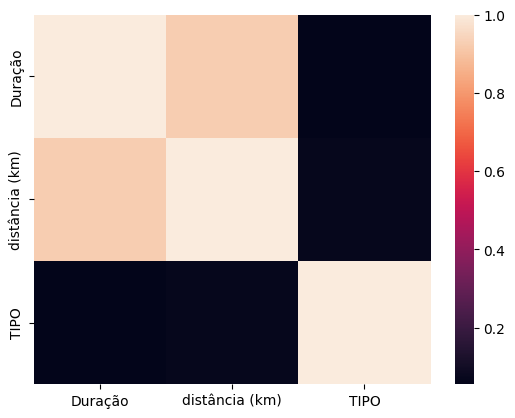

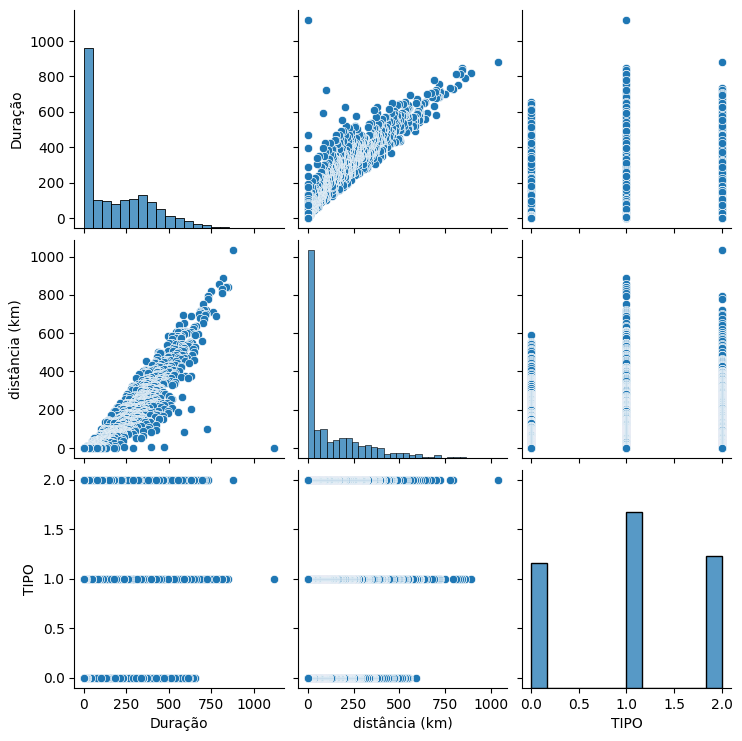

In [7]:
sns.heatmap(df.corr())
sns.pairplot(df)

- Percebe-se que é clara a correlação entre a duração e a distância, comportamento quase linear

# REGRESSÃO LINEAR

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

In [9]:
def sympyLinearRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.25)

    regressaoLinear = LinearRegression()
    regressaoLinear.fit(xTreino, yTreino)
    
    a = regressaoLinear.coef_
    b = regressaoLinear.intercept_

    total = 0
    for i in range(len(a)):
        total += sp.var(f'x_{i}')*a[i]

    return total + b

def linearRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.25)

    regressaoLinear = LinearRegression()
    regressaoLinear.fit(xTreino, yTreino)
    
    score = regressaoLinear.score(xTeste, yTeste)
    return regressaoLinear, score


xData = df[['Duração', 'TIPO']]
yData = df['distância (km)']

model, score = linearRegression(xData, yData)
f = sympyLinearRegression(xData, yData)

display(f)

0.801562967360106*x_0 + 3.8287718699926*x_1 - 24.1948167186108

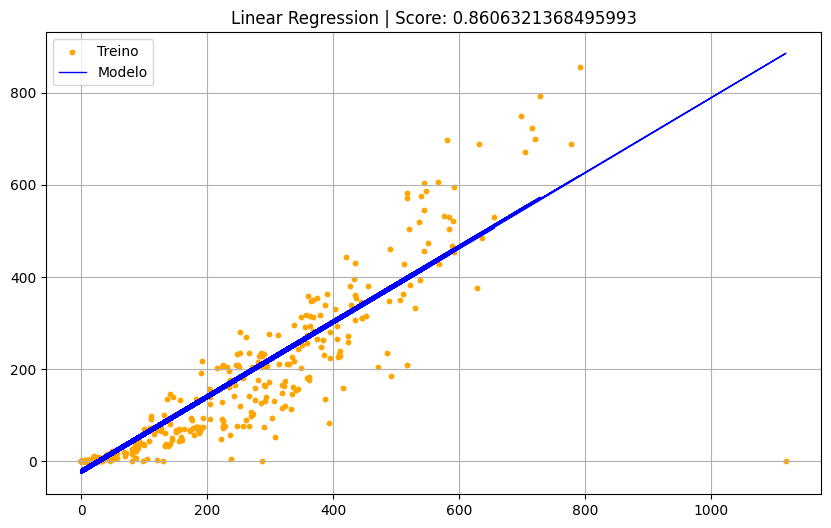

In [10]:
xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.25)
yModel = model.predict(xTeste)

plt.figure(figsize=(10, 6))
plt.scatter(xTeste['Duração'], yTeste, color='orange', s=10, label='Treino')
plt.plot(xTeste['Duração'], yModel, linewidth=1, label='Modelo', color='blue')

plt.title('Linear Regression | Score: ' + str(score))
plt.legend()
plt.grid()

# REGRESSÃO POLNOMIAL
- Ao invés de aproximarmos os dados por uma reta, podemos aproximá-los por um polinômio

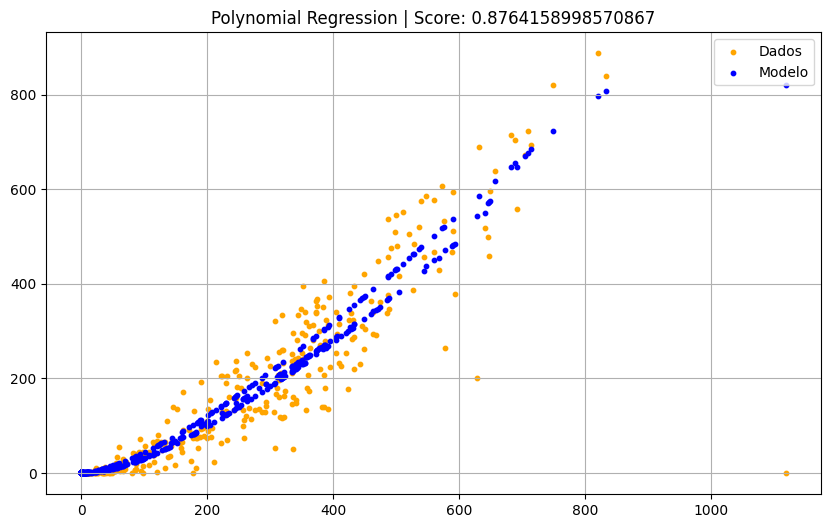

In [11]:
def polinomialRegression(degree=2):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression())

xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.25)
model  = polinomialRegression(6).fit(xTreino, yTreino)
yModel = model.predict(xTeste)
score  = metrics.r2_score(yTeste, yModel)

plt.figure(figsize=(10, 6))
plt.scatter(xTeste['Duração'], yTeste, color='orange', s=10, label='Dados')
plt.scatter(xTeste['Duração'], yModel, s=10, label='Modelo', color='blue')

plt.title('Polynomial Regression | Score: ' + str(score))
plt.legend()
plt.grid()